<h2 style="text-align: center;">Predicting Personal Loan Purchases Using Classification Models</h2>

<div style="text-align: center;">
  <img src="https://images.unsplash.com/photo-1607863680198-23d4b2565df0?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="A beautiful landscape" style="width: 300px;">
</div>

# Context
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# Objective:
Study the data distribution in each attribute, share your findings.
Use a classification model to predict the likelihood of a liability
customer buying personal loans.


# Contents
- 1. Data importing and dictionary
- 2. EDA
- 3. Train / Test Splitting the data
- 4. Feature Engineering
- 5. Logistic Regression
- 6. Performance Evaluation
- 7. Finding top 500 most likely to accept a personal loan
- 8. Calculating the odds of a new customer accepting a personal loan

# 1. Data importing and dictionary

In [7]:
# Importing the big 4 - Pandas, Numpy, Seaborn & matplotlib
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics # Import the metrics we'll be using
from sklearn.model_selection import GridSearchCV

# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)
import statsmodels.api as sm

from IPython.display import clear_output
import time

In [8]:
dataset = "Bank_Personal_Loan_Modelling - Data.csv"
bank_df = pd.read_csv(dataset)

In [9]:
bank_df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## 1.1 Data Description

- **ID**: Customer ID
- **Age**: Customer's age in completed years
- **Experience**: Number of years of professional experience
- **Income**: Annual income of the customer ($000)

- **ZIP Code**: Home address ZIP code
- **Family**: Family size of the customer
- **CCAvg**: Average spending on credit cards per month ($000)

- **Education**: Education Level
  - 1: Undergrad
  - 2: Graduate
  - 3: Advanced/Professional
- **Mortgage**: Value of house mortgage if any ($000)
- **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?
- **Securities Account**: Does the customer have a securities account with the bank?
- **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
- **Online**: Does the customer use internet banking facilities?
- **CreditCard**: Does the customer use a credit card issued by UniversalBank?


# 2. EDA

In [12]:
bank_df.shape

(5000, 14)

In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Note: Simple dataset with all numerical values and no nulls

In [15]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
bank_df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [17]:
bank_df['Personal Loan'].value_counts(normalize = True)

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Note: Target column quite unbalanced (significantly more 0 then 1). DT may not be too good unless we artifcially add more data (Increase df[Pesonal Loan] :1)

In [19]:
# Data exploration
# for my_column in bank_df.columns:
#     plt.figure(figsize=(10, 6))
#     custom_palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#     sns.countplot(x=my_column, hue="Personal Loan", data=bank_df, palette=custom_palette)
#     plt.title(f'Count of {my_column}')
#     plt.xlabel(my_column)
#     plt.ylabel('Count')
#     plt.show()

In [20]:
# Checking Pearson Correlations
df_corr = bank_df.corr(numeric_only = True)
# df_corr

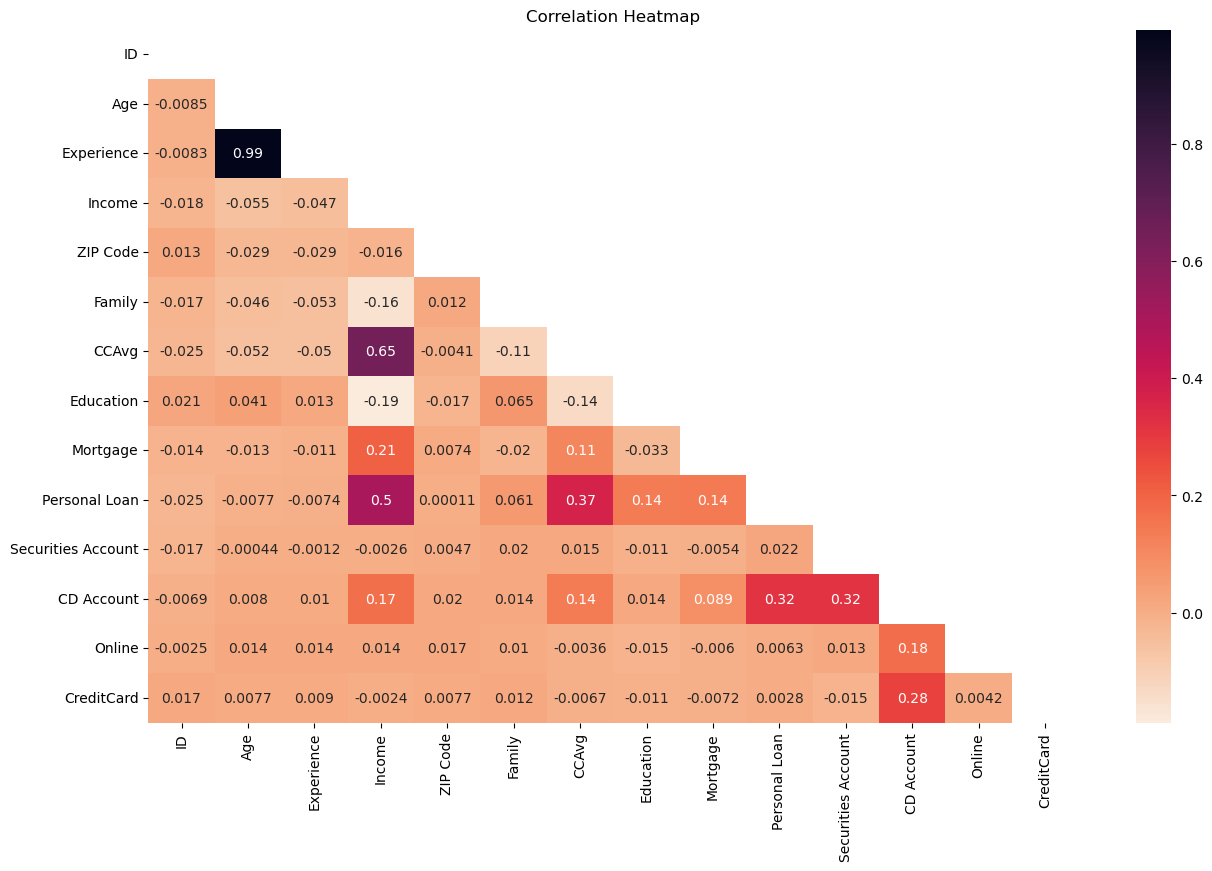

In [21]:
plt.figure(figsize=(15,9))
# sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
sns.heatmap(df_corr, annot=True, cmap='rocket_r', mask = np.triu(df_corr))

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()


<h2> 2.2 Observations</h2>

Data is clean overral, there are no null values and all the data is numerical.

Could consider for feature engineering:
- Scaling columns ['Age', 'Experience', 'Income', 'Family', 'CCAvg']
- Removing 'Zip Code' column
- Expirience and age columns have a 0.99 correlation (suggests collinearity) do we need both? -- Will look into this in the next section.

# Check for multicollinearity

Check if we should drop age colunm using a variation inflation factor (saw a large correlation in Pearrson corr betwwen age and expirience).

In [25]:
feature_cols = list(bank_df.columns)
feature_cols.remove('Personal Loan')

In [26]:
feature_cols

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [27]:
## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(bank_df[feature_cols].values, i) for i in range(bank_df[feature_cols].shape[1])], index = bank_df[feature_cols].columns)

ID                       4.007942
Age                   1275.042750
Experience             314.685071
Income                   6.596040
ZIP Code               367.803830
Family                   5.541795
CCAvg                    3.854692
Education                6.703085
Mortgage                 1.375965
Securities Account       1.269910
CD Account               1.415041
Online                   2.578500
CreditCard               1.569272
dtype: float64

In [28]:
## This a piece of code from stats.stackexchange.com

## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [29]:
calculate_vif(bank_df[feature_cols]) # Will drop the age column

dropping 'Age' at index: 1
dropping 'ZIP Code' at index: 3
dropping 'Income' at index: 2
Remaining variables:
Index(['ID', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')


,ID,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,1,4,1.6,1,0,1,0,0,0
1,2,19,3,1.5,1,0,1,0,0,0
2,3,15,1,1.0,1,0,0,0,0,0
3,4,9,1,2.7,2,0,0,0,0,0
4,5,8,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,4996,3,1,1.9,3,0,0,0,1,0
4996,4997,4,4,0.4,1,85,0,0,1,0
4997,4998,39,2,0.3,3,0,0,0,0,0
4998,4999,40,3,0.5,2,0,0,0,1,0


# 3. Train / Test Splitting the data

In [31]:
X = bank_df.drop('Personal Loan', axis=1) # Features

y = bank_df['Personal Loan'] # Target


X_train, X_test, y_train, y_test = train_test_split(X,   #Features
                                                    y,   #Target 
                                                    test_size=0.2,   #20% test size
                                                    random_state=30) # So we don't keep getting different test sample/ train split -- IMPORTANT!


In [32]:
# Check train/test split successful
all(X_train.index == y_train.index)

True

# 4. Feature Engineering

In [34]:
def feature_eng(df):
    # Drop non-useful columns
    df_fe = df.drop(columns = ['ID','ZIP Code', 'Age', 'Income'],axis = 1)
    
    # Scaling data
    columns_to_scale = ['Experience', 'Family', 'CCAvg', 'Mortgage']
    
    minmax = MinMaxScaler() # Initialize the MinMaxScaler
    df_fe[columns_to_scale] = minmax.fit_transform(df_fe[columns_to_scale])
    
    
    return df_fe

In [35]:
# Apply feature engineering on X_train, X_test
X_train_fe = feature_eng(X_train)
X_test_fe = feature_eng(X_test)

In [36]:
X_train_fe.head(3)

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1237,0.347826,0.000000,0.680,3,0.0,0,1,1,1
3076,0.043478,0.333333,0.175,3,0.0,0,0,0,1
3808,0.282609,0.333333,0.650,1,0.0,0,0,0,0


# 5. Logistic Regression

In [38]:
# Initialise model
lr = LogisticRegression(max_iter=350, random_state=10)

In [39]:
# Define the hyperparameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter': [100, 200, 300] }
# All these were tested best model parameters entered below:

param_grid = {
    'C': [100], 
    'max_iter': [300],
    'penalty': ['l2'],
    'solver': ['lbfgs']
} 


# Setup the grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=350, random_state=10),
             param_grid={'C': [100], 'max_iter': [300], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [40]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy score:  0.924


In [41]:
# Apply best parameters and fit the model on 
lr = LogisticRegression(C= 100, max_iter= 100, penalty= 'l1', solver= 'liblinear', random_state=10)
lr.fit(X_train_fe, y_train)

LogisticRegression(C=100, penalty='l1', random_state=10, solver='liblinear')

# Test Results:
Best parameters found:  {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Best accuracy score:  0.9502499999999999

In [43]:
# Make prediction on our train data
lr.predict_proba(X_train_fe)

array([[0.05410245, 0.94589755],
       [0.95907646, 0.04092354],
       [0.70793332, 0.29206668],
       ...,
       [0.99323615, 0.00676385],
       [0.49496973, 0.50503027],
       [0.93250648, 0.06749352]])

In [44]:
# store data in 2 columns called 'deny_loan' and 'accept_loan'
X_train_fe[['deny_loan', 'accept_loan']] = lr.predict_proba(X_train_fe)

In [45]:
X_train_fe.head()

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan
1237,0.347826,0.000000,0.680,3,0.000000,0,1,1,1,0.054102,0.945898
3076,0.043478,0.333333,0.175,3,0.000000,0,0,0,1,0.959076,0.040924
3808,0.282609,0.333333,0.650,1,0.000000,0,0,0,0,0.707933,0.292067
1734,0.282609,1.000000,0.210,3,0.286614,0,0,1,0,0.737720,0.262280
2959,0.326087,1.000000,0.020,1,0.000000,0,0,0,0,0.986608,0.013392


In [46]:
# Make a prediction column based on probability (0.5)
X_train_fe['y_pred'] = np.where(X_train_fe['accept_loan']>.5, #condition set
                              1, # output if condition is true
                              0)# output if condition is false

In [47]:
X_train_fe.head(3)

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan,y_pred
1237,0.347826,0.000000,0.680,3,0.0,0,1,1,1,0.054102,0.945898,1
3076,0.043478,0.333333,0.175,3,0.0,0,0,0,1,0.959076,0.040924,0
3808,0.282609,0.333333,0.650,1,0.0,0,0,0,0,0.707933,0.292067,0


# 6. Performance Evaluation

In [49]:
## We'll use our trusty confusion matrix to answer the question above. Let's first have a look at it on its own
print(metrics.confusion_matrix(y_train, #Actual
                               X_train_fe['y_pred'])) # Predicted

[[3560   50]
 [ 254  136]]


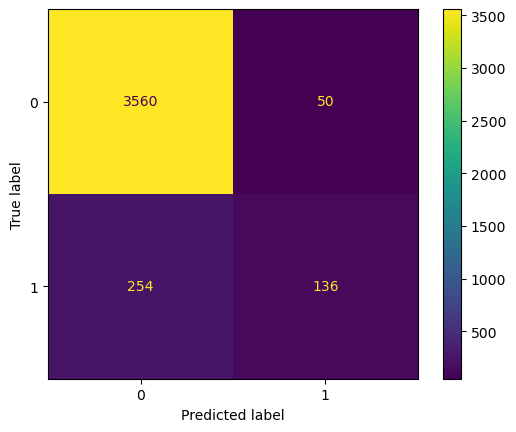

In [50]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, X_train_fe['y_pred'])).plot()
plt.show()

In [51]:
## There are 4 main metrics we're interested in at this stage: accuracy, precision, recall and F1.
## The 'metrics' module from sklearn covers all of them (and more!) So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [52]:
## Now, we simply apply the function on our predictions
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3560   50]
 [ 254  136]] 

The accuracy of your model is: 0.924
The recall of your model is: 0.3487179487179487
The precision of your model is: 0.7311827956989247
The F1-score of your model is: 0.47222222222222227


# 6.1 Performance on test

In [54]:
# # Insert test data into model
# lr.fit(X_test_fe, y_test) # LogisticRegression(C= 100, max_iter= 100, penalty= 'l1', solver= 'liblinear', random_state=10)

In [55]:
# Make prediction on our test data
lr.predict_proba(X_test_fe)

array([[0.99102303, 0.00897697],
       [0.67425853, 0.32574147],
       [0.84408924, 0.15591076],
       ...,
       [0.91288143, 0.08711857],
       [0.9787221 , 0.0212779 ],
       [0.93353644, 0.06646356]])

In [56]:
# store data in 2 columns called 'deny_loan' and 'accept_loan'
X_test_fe[['deny_loan', 'accept_loan']] = lr.predict_proba(X_test_fe)

In [57]:
X_test_fe.head(3)

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan
2192,0.088889,1.0,0.10,1,0.163230,0,0,0,1,0.991023,0.008977
911,0.533333,1.0,0.26,3,0.000000,0,0,0,0,0.674259,0.325741
3061,0.355556,0.0,0.40,3,0.353952,1,0,1,0,0.844089,0.155911


In [58]:
# Make a prediction column based on probability (0.5)
X_test_fe['y_pred'] = np.where(X_test_fe['accept_loan']>.5, #condition set
                              1, # output if condition is true
                              0)# output if condition is false

In [59]:
X_test_fe.head()

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan,y_pred
2192,0.088889,1.000000,0.10,1,0.163230,0,0,0,1,0.991023,0.008977,0
911,0.533333,1.000000,0.26,3,0.000000,0,0,0,0,0.674259,0.325741,0
3061,0.355556,0.000000,0.40,3,0.353952,1,0,1,0,0.844089,0.155911,0
3382,0.866667,0.333333,0.28,1,0.000000,1,1,1,0,0.768953,0.231047,0
2939,0.600000,1.000000,0.04,3,0.000000,0,0,0,1,0.967420,0.032580,0


In [60]:
## Now, we simply apply the function on our predictions
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for your predictions is:
[[902   8]
 [ 54  36]] 

The accuracy of your model is: 0.938
The recall of your model is: 0.4
The precision of your model is: 0.8181818181818182
The F1-score of your model is: 0.537313432835821


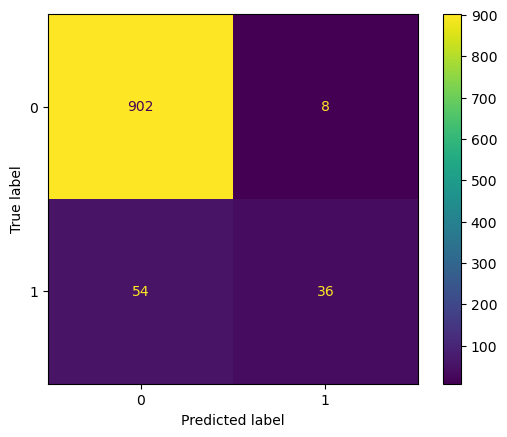

In [61]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, X_test_fe['y_pred'])).plot()
plt.show()

# 6.2 Comparing train vs test results

Train:
- The accuracy of your model is: 0.924
- The recall of your model is: 0.3487179487179487
- The precision of your model is: 0.7311827956989247
- The F1-score of your model is: 0.47222222222222227

Test:
- The accuracy of your model is: 0.938
- The recall of your model is: 0.4
- The precision of your model is: 0.8181818181818182
- The F1-score of your model is: 0.537313432835821

Takeaway:
- The model appears to be slightly more accurate on the test data compared to the training set (0.014) which suggests the model is not overfit.
- Since the purpose of this data is to predict the likelihood of a liability customers buying personal loans we could prioritise recall in the future to limit false negatives (prevent customers who would want the loan not being offered).
- Our model performs quite poorly on recall capturing less then 50%.
- To increase recall we could decrease the threshold of our model potentially at the cost of precision/accuracy.

# 7. Finding top 500 most likely to accept a personal loan

In [65]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [66]:
# Make a new DF and whole data and apply FE
top_500 = bank_df.copy()
top_500 = top_500.drop(columns='Personal Loan')
top_500 = feature_eng(top_500)

In [67]:
lr.predict_proba(top_500)

array([[0.98659748, 0.01340252],
       [0.99150172, 0.00849828],
       [0.99217403, 0.00782597],
       ...,
       [0.95150402, 0.04849598],
       [0.98173095, 0.01826905],
       [0.99736411, 0.00263589]])

In [68]:
# store data in 2 columns called 'deny_loan' and 'accept_loan'
top_500[['deny_loan', 'accept_loan']] = lr.predict_proba(top_500)

In [69]:
top_500.head()

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan
0,0.086957,1.000000,0.16,1,0.0,1,0,0,0,0.986597,0.013403
1,0.478261,0.666667,0.15,1,0.0,1,0,0,0,0.991502,0.008498
2,0.391304,0.000000,0.10,1,0.0,0,0,0,0,0.992174,0.007826
3,0.260870,0.000000,0.27,2,0.0,0,0,0,0,0.937286,0.062714
4,0.239130,1.000000,0.10,2,0.0,0,0,0,1,0.981537,0.018463


In [70]:
top_500 = top_500.loc[top_500['accept_loan'].nlargest(500).index]
top_500.head()

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan
2841,0.304348,1.000000,0.73,2,0.889764,0,1,1,0,0.002708,0.997292
243,0.913043,0.666667,0.79,3,0.155906,0,1,1,0,0.003343,0.996657
2812,0.673913,0.666667,0.82,3,0.735433,0,1,1,1,0.003518,0.996482
4008,0.739130,0.666667,0.75,3,0.552756,0,1,1,1,0.007511,0.992489
570,0.608696,0.666667,0.65,2,0.763780,1,1,0,0,0.012990,0.987010


In [71]:
top_500['ID'] = top_500.index
top_500_list = top_500['ID'].tolist()
len(top_500_list)

500

In [72]:
# Here is the list of ID's for the top 500 most likely to accept a personal loan
#top_500_list

# 8. Calculating the odds of a new customer accepting a personal loan

- **ID**: Customer ID
- **Age**: Customer's age in completed years
- **Experience**: Number of years of professional experience
- **Income**: Annual income of the customer ($000)

- **ZIP Code**: Home address ZIP code
- **Family**: Family size of the customer
- **CCAvg**: Average spending on credit cards per month ($000)

- **Education**: Education Level
  - 1: Undergrad
  - 2: Graduate
  - 3: Advanced/Professional
- **Mortgage**: Value of house mortgage if any ($000)
- **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?
- **Securities Account**: Does the customer have a securities account with the bank?
- **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
- **Online**: Does the customer use internet banking facilities?
- **CreditCard**: Does the customer use a credit card issued by UniversalBank?

# Loan probability function

In [76]:
# Function to give recommedations / probability
def loan_prob():   
    
        # Ask questions and collect answers
        questions = ["Number of years of professional experience:", "Number of immediate family:",
                    "Average spending on credit cards per month ($000):", "Education level(1-3):", "Value of house mortgage if any ($000)", 
                     "Does the customer have a securities account with the bank?(1-Yes, 0-No):", 
                     "Does the customer have a certificate of deposit (CD) account with the bank?(1-Yes, 0-No):",
                     " Does the customer use internet banking facilities?(1-Yes, 0-No):",
                    "Does the customer use a credit card issued by UniversalBank?(1-Yes, 0-No):"]
        # Create a list with the headers of the columns
        columns = ["Experience", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"]
        answers = {}
        
        # Zip our answers with our column headers
        for question, column in zip(questions, columns):
            while True:
                try:
                    answer = input(question + " ")

                    # Check if the column requires a 0 or 1 answer
                    if column in ["Securities Account", "CD Account", "Online", "CreditCard"]:
                        if answer not in ["0", "1"]:
                            raise ValueError("Please enter 0 or 1.")
                    elif column == "CCAvg":
                        # Check if the input is a valid float
                        if not answer.replace('.', '', 1).isdigit():
                            raise ValueError("Please enter a valid number.")
                        answer = float(answer)  # Convert to float
                    elif column == "Education":
                        # Check if the input is a valid integer and between 1 and 3
                        if not answer.isdigit() or not (1 <= int(answer) <= 3):
                            raise ValueError("Please enter a valid number between 1 and 3.")
                        answer = int(answer)  # Convert to integer
                    else:
                        # Check if the input is a valid integer
                        if not answer.isdigit():
                            raise ValueError("Please enter a valid number.")
                        answer = int(answer)  # Convert to integer

                    answers[column] = answer
                    break  # Exit the loop if the input is valid
                except ValueError as e:
                    print(e)


        # Convert the dictionary into a pandas DataFrame
        user_df = pd.DataFrame([answers])
        user_df['CCAvg'] = user_df['CCAvg'].astype(float)

        # Add the new data to the entire df
        complete_df = pd.concat([bank_df, user_df], ignore_index=True)
        complete_df = complete_df.fillna(0)
        complete_df['CCAvg'] = complete_df['CCAvg'].astype(float)

        # Drop columns - Age IDIncome Personal Loan ZIP Code
        columns_to_drop = ['Age', 'ID', 'Income', 'Personal Loan', 'ZIP Code']
        complete_df = complete_df.drop(columns=columns_to_drop)


        # Apply scaler
        columns_to_scale = ['Experience', 'Family', 'CCAvg', 'Mortgage'] # Columns scaled
        minmax = MinMaxScaler() # Initialize the MinMaxScaler
        complete_df[columns_to_scale] = minmax.fit_transform(complete_df[columns_to_scale]) # Apply scaler

        # Fit user data into model
        lr.predict_proba(complete_df)

        # store data in 2 columns called 'deny_loan' and 'accept_loan'
        complete_df[['deny_loan', 'accept_loan']] = lr.predict_proba(complete_df)

        # Remove user inputs
        clear_output(wait=True)

        # Probability of accepting the personal loan
        column_name = 'accept_loan'
        loan_prob = complete_df.iloc[-1][column_name] * 100
        loan_statement = print(f"Chance of customer accepting personal loan: {loan_prob}%")
        
        # Recommender function:
        def recommendation():
            time.sleep(2)
            if loan_prob>40:
                print("Recommend: Offering customer a personal loan.")
            else:
                print("Customer unlikely to accept personal loan.")


        return loan_statement, recommendation(), proceed()

    
# Continue function
def proceed():
    next_customer = input("Would you like to check another customer? (y/n): ")
    if next_customer.lower() == "y":
        clear_output(wait=True)
        loan_prob()
    elif next_customer.lower() == "n":
        print("Have an awesome day!")
    else:
        clear_output(wait=True)
        print("Wasn't quite sure what that meant.")
        proceed()

# Calling function for new customers

In [78]:
loan_prob()

Chance of customer accepting personal loan: 48.10043730171999%
Recommend: Offering customer a personal loan.


Would you like to check another customer? (y/n):  N


Have an awesome day!


(None, None, None)

In [79]:
# We can check our model against random customers (In the testing set)
X_test_fe = X_test_fe.sort_index()
X_test_fe.head()

,Experience,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,deny_loan,accept_loan,y_pred
8,0.288889,0.666667,0.06,2,0.178694,0,0,1,0,0.972267,0.027733,0
15,0.733333,0.000000,0.15,3,0.000000,0,0,1,1,0.985518,0.014482,0
17,0.466667,1.000000,0.24,1,0.000000,0,0,0,0,0.946742,0.053258,0
18,0.533333,0.333333,0.81,3,0.000000,0,0,0,0,0.103448,0.896552,1
19,0.688889,0.000000,0.05,2,0.000000,1,0,0,1,0.998250,0.001750,0


In [80]:
# Use data to input into our formula -- loan_prob()
df_slice_direct = bank_df[15:20]
df_slice_direct

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
17,18,42,18,81,94305,4,2.4,1,0,0,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
19,20,55,28,21,94720,1,0.5,2,0,0,1,0,0,1
